In [1]:
import IPython.html.widgets
import netCDF4
import numpy as np

:0: FutureWarning: IPython widgets are experimental and may change in the future.


/Users/justinbrown/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:8: RuntimeWarning: invalid value encountered in true_divide
/Users/justinbrown/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:9: RuntimeWarning: invalid value encountered in true_divide


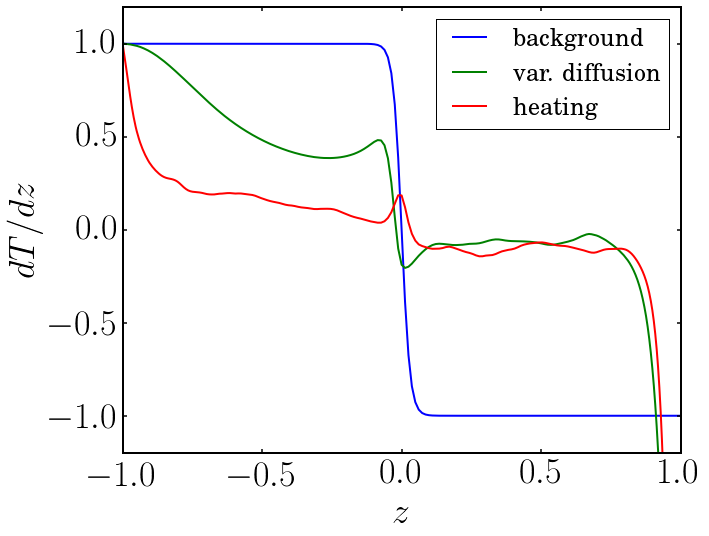

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
dataset = netCDF4.Dataset ('sims/variable/avg_diff.cdf', 'r')
dataset_heat = netCDF4.Dataset ('sims/variable/avg_grad.cdf', 'r')
plt.style.use ("presentation")

plt.plot (dataset ["z"], dataset ["korre_Ts"], label = "background")
plt.plot (dataset ["z"], dataset ["temperature_deriv"] [:] / dataset ["z_deriv"] [:] + dataset ["korre_Ts"] [:], label = "var. diffusion")
plt.plot (dataset ["z"], dataset_heat ["temperature_deriv"] [:] / dataset_heat ["z_deriv"] [:] + dataset_heat ["korre_Ts"] [:], label = "heating")

plt.xlabel ("$z$")
plt.ylabel ("$dT/dz$")

plt.ylim ((-1.2, 1.2))

plt.legend ()

plt.show ()

In [4]:
dataset = netCDF4.Dataset ('sims/variable/output_00.cdf', 'r')

ts = []
for i in range (len (dataset.variables["S"])):
    data = {}
    dkeys = dataset.variables.keys()
    for k in dkeys:
        data[k] = atleast_3d(dataset.variables[k] [i])
    
    # To plot 2D or 1D data, set the size of the unused dims to 1 in dshape
    # Otherwise, treat it like 3D data
        
    bbox = array([[-1.0,1.0],[-1.0,1.0],[0.0,0.0]])
    dshape2d = data['T'].shape
    dshape = (dshape2d[0],dshape2d[1],1) # 2D geometry
    scalemultiplier = 1.0
    ts.append (load_uniform_grid(data,dshape,""))
print (len (ts))
ts = DatasetSeries (ts)

dataset.close ()

RuntimeError: No such file or directory

4



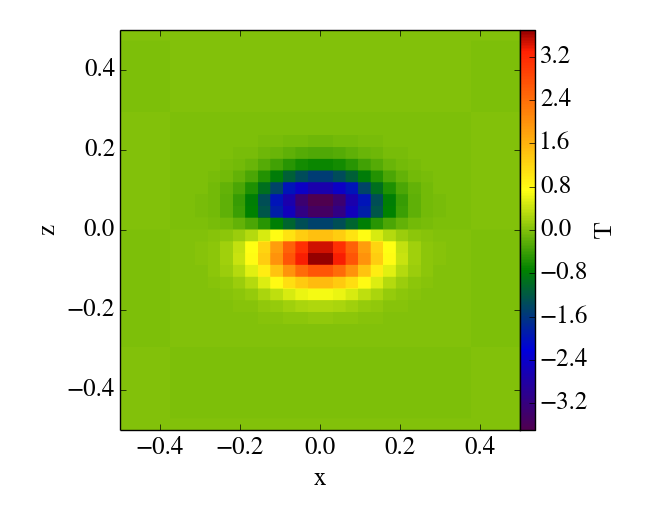

<function __main__.plot_record>

In [9]:
def plot_record (i):
    print (i)
    p=SlicePlot(ts [i],"z","T")
    p.set_figure_size (4)
    p.set_log ("T", False)
    p.set_xlabel ("x")
    p.set_ylabel ("z")
    p.show ()

IPython.html.widgets.interact(plot_record,i=(0,len (ts) - 1,1))

In [1]:
p.save ()

NameError: name 'p' is not defined

In [3]:
from pisces_utils.analysis.output import Output
%pdb

Automatic pdb calling has been turned OFF


In [4]:
c1 = Output("sims/converge/diffusion/diff_0032_0.017783/output/cart_00_00.cdf")
c2 = Output("sims/converge/diffusion/diff_0032_0.056234/output/cart_00_00.cdf")
c3 = Output("sims/converge/diffusion/diff_0032_0.177828/output/cart_00_00.cdf")
d1 = Output("sims/converge/diffusion/diff_0128_0.017783/output/cart_00_00.cdf")


Seeking  sims/converge/diffusion/diff_0032_0.017783/output/cart_00_00.cdf
Seeking  sims/converge/diffusion/diff_0032_0.056234/output/cart_00_00.cdf
Seeking  sims/converge/diffusion/diff_0032_0.177828/output/cart_00_00.cdf
Seeking  sims/converge/diffusion/diff_0128_0.017783/output/cart_00_00.cdf


In [5]:
c3.norm(c1, variable="scalar", other_index=0, self_index=0)

4.3046586040087937e-06

In [12]:
positions = ("x", "z")
self_index = 0
other_index = 0
variable = "scalar"
from scipy.interpolate import LinearNDInterpolator
import numpy as np
self = d1
other = c3
flattened = [self.variables[var][self_index].flatten() for var in positions]
points = [i for i in zip(*flattened)]
values = self.variables[variable][self_index].flatten()

inter_flattened = [other.variables[var][other_index].flatten() for var in positions]
inter_points = [i for i in zip(*inter_flattened)]

interpolator = LinearNDInterpolator(points, values)
new_values = np.array([interpolator(point) for point in inter_points])
diff = (new_values - other.variables[variable][other_index].flatten())

In [10]:
for i in zip(inter_points, new_values, other.variables[variable][other_index].flatten()):
    print(i)

((-0.5, -0.5), 0.0, 0.0)
((-0.5, -0.49759236333609846), 0.0, 0.0)
((-0.5, -0.49039264020161522), 0.0, 0.0)
((-0.5, -0.47847016786610441), 0.0, 0.0)
((-0.5, -0.46193976625564337), 0.0, 0.0)
((-0.5, -0.44096063217417752), 0.0, 0.0)
((-0.5, -0.41573480615127262), 0.0, 0.0)
((-0.5, -0.3865052266813685), 0.0, 0.0)
((-0.5, -0.35355339059327379), 1.9688980287284647e-222, 0.0)
((-0.5, -0.3171966420818228), 0.0, 0.0)
((-0.5, -0.27778511650980114), 0.0, 0.0)
((-0.5, -0.2356983684129989), 0.0, 0.0)
((-0.5, -0.19134171618254492), 0.0, 0.0)
((-0.5, -0.14514233862723114), 0.0, 0.0)
((-0.5, -0.097545161008064152), 0.0, 0.0)
((-0.5, -0.049008570164780385), 0.0, 0.0)
((-0.5, -3.061616997868383e-17), 0.0, 0.0)
((-0.5, 0.04900857016478033), 0.0, 0.0)
((-0.5, 0.097545161008064096), 0.0, 0.0)
((-0.5, 0.14514233862723111), 0.0, 0.0)
((-0.5, 0.19134171618254486), 0.0, 0.0)
((-0.5, 0.23569836841299885), 0.0, 0.0)
((-0.5, 0.27778511650980098), 0.0, 0.0)
((-0.5, 0.31719664208182263), 1.0616493515795617e-307, 0.

In [11]:
for i in zip(points, values):
    print(i)

((-0.5, -0.5), 0.0)
((-0.5, -0.49984940934810212), 0.0)
((-0.5, -0.4993977281025862), 0.0)
((-0.5, -0.4986452283393451), 3.3130628837559152e-41)
((-0.5, -0.49759236333609846), 0.0)
((-0.5, -0.49623976729935498), 0.0)
((-0.5, -0.49458825498239051), 0.0)
((-0.5, -0.49263882119447061), 0.0)
((-0.5, -0.49039264020161522), 0.0)
((-0.5, -0.48785106501926429), 0.0)
((-0.5, -0.48501562659727199), 0.0)
((-0.5, -0.48188803289771992), 0.0)
((-0.5, -0.47847016786610441), 0.0)
((-0.5, -0.47476409029651834), 0.0)
((-0.5, -0.4707720325915104), 0.0)
((-0.5, -0.46649639941736948), 0.0)
((-0.5, -0.46193976625564337), 0.0)
((-0.5, -0.45710487785176535), 0.0)
((-0.5, -0.45199464656172167), 0.0)
((-0.5, -0.44661215059775766), 0.0)
((-0.5, -0.44096063217417752), 0.0)
((-0.5, -0.43504349555435573), 0.0)
((-0.5, -0.42886430500013606), 0.0)
((-0.5, -0.42242678262485356), 0.0)
((-0.5, -0.41573480615127262), 0.0)
((-0.5, -0.40879240657579186), 0.0)
((-0.5, -0.40160376574032247), 0.0)
((-0.5, -0.39417321381330317

In [9]:
max(new_values), other.variables["scalar"].shape

(0.14406310085474042, (2, 32, 33))

In [3]:
positions = ("x", "z")
for i in zip(d1.variables[var][-1].flatten() for var in positions):
    print(i)

(array([-0.5, -0.5, -0.5, ...,  0.5,  0.5,  0.5]),)
(array([-0.5       , -0.49984941, -0.49939773, ...,  0.49939773,
        0.49984941,  0.5       ]),)


In [8]:
d1.variables["x"][-1].flatten(), d1.variables["z"][-1].flatten()

[array([-0.5, -0.5, -0.5, ...,  0.5,  0.5,  0.5]),
 array([-0.5       , -0.49984941, -0.49939773, ...,  0.49939773,
         0.49984941,  0.5       ])]

In [22]:
c1["x"].dimensions[1]

'x'

In [8]:
for i in zip(*[d1.variables[var][-1].flatten() for var in positions]):
    print(i)

(-0.5, -0.5)
(-0.5, -0.49984940934810212)
(-0.5, -0.4993977281025862)
(-0.5, -0.4986452283393451)
(-0.5, -0.49759236333609846)
(-0.5, -0.49623976729935498)
(-0.5, -0.49458825498239051)
(-0.5, -0.49263882119447061)
(-0.5, -0.49039264020161522)
(-0.5, -0.48785106501926429)
(-0.5, -0.48501562659727199)
(-0.5, -0.48188803289771992)
(-0.5, -0.47847016786610441)
(-0.5, -0.47476409029651834)
(-0.5, -0.4707720325915104)
(-0.5, -0.46649639941736948)
(-0.5, -0.46193976625564337)
(-0.5, -0.45710487785176535)
(-0.5, -0.45199464656172167)
(-0.5, -0.44661215059775766)
(-0.5, -0.44096063217417752)
(-0.5, -0.43504349555435573)
(-0.5, -0.42886430500013606)
(-0.5, -0.42242678262485356)
(-0.5, -0.41573480615127262)
(-0.5, -0.40879240657579186)
(-0.5, -0.40160376574032247)
(-0.5, -0.39417321381330317)
(-0.5, -0.3865052266813685)
(-0.5, -0.37860442325324228)
(-0.5, -0.37047556267747961)
(-0.5, -0.3621235414757335)
(-0.5, -0.35355339059327379)
(-0.5, -0.34477027236853347)
(-0.5, -0.33577947742350922)
(-0.5,